In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
def kmeans(X,K,max_iters=100):
           centroids=X[:K]
           for _ in range(max_iters):
               expanded_x = X[:,np.newaxis]
               euc_dist = np.linalg.norm(expanded_x-centroids,axis=2)
               labels = np.argmin(euc_dist,axis=1)
               new_centroids = np.array([X[labels==k].mean(axis=0) for k in range(K)])
               if np.all(centroids==new_centroids):
                   break
               centroids = new_centroids
           return labels,centroids

In [3]:
X=load_iris().data
K=3
labels,centroids=kmeans(X,K)
print("Labels: ",labels)
print("Centroids: ",centroids)

Labels:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Centroids:  [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


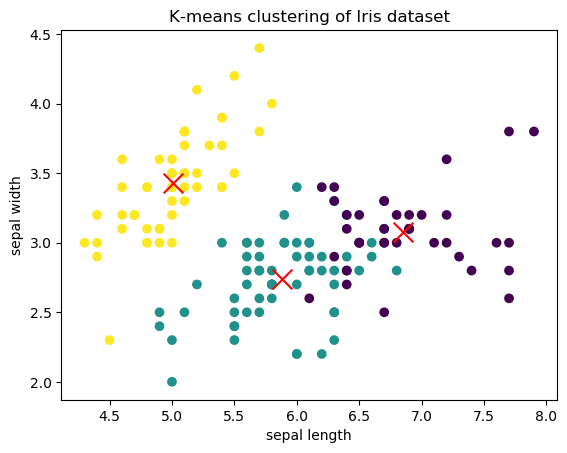

In [4]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red',s=200)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K-means clustering of Iris dataset')
plt.show()